In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import math

Text(0, 0.5, 'Concentration')

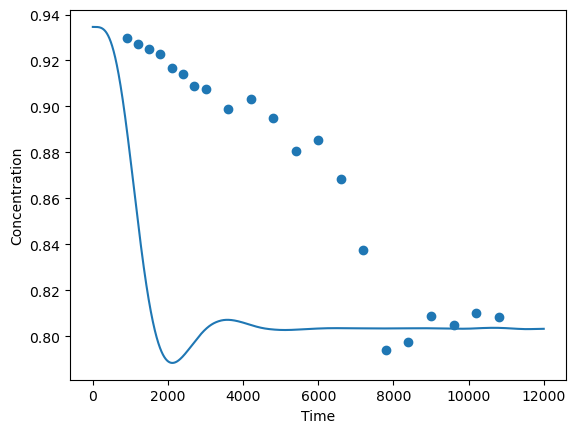

In [3]:
def generateODE7(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.9346                     # gm/(100 gm of mixed solvent)
    Ce = 0.70325                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    
    A1= 0.001
    g1= 1.3674422124010206
    A2= 0.001
    g2= 0.8806401378356327
    kb= 1.9159735378591962
    b= 0.11727791169769848
    
    f = 3.33 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]
t_span7 = (0, 12000)  # Adjust this to match the maximum time in your data
num_points7 = 12000
initialConditions7 = [0, 0, 0, 0, 0.9346]
sol7 = solve_ivp(
    lambda t, m: generateODE7(t, m),
    t_span7,
    initialConditions7,
    t_eval=np.linspace(t_span7[0], t_span7[1], num_points7)
)
Time7=[900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800]
Concentration7=[0.9298566259,0.9273753617,0.9249580909,0.9228644065,0.9167521496,0.9141323339,0.9089792409,0.9074454554,0.898869261,0.903062857,0.8949772304,0.8805239819,0.8854835155,0.8683936374,0.8374843377,0.7938727652,0.7975493067,0.808957393,0.8046940862,0.8099867757,0.8083711434]
plt.scatter(Time7, Concentration7)
plt.plot(sol7.t,sol7.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")